This analysis explores the rainfall, temperature, humidity, and other climatic variables across various cities in Germany from 2015 to 2023. The dataset includes data for **1080 observations** from **10 cities**, providing insights into seasonal trends, geographical distributions, and the relationships between different climatic factors.

Key variables in the dataset include:
- **Rainfall (mm)**: The amount of rainfall recorded in each city.
- **Temperature (°C)**: The recorded temperature in each city.
- **Humidity (%)**: The relative humidity in the air.
- **City**, **Latitude**, **Longitude**, **Elevation (m)**, and **Climate_Type** are also included to provide context for the rainfall and temperature data.

The analysis aims to uncover patterns in rainfall distribution, seasonal effects, geographical trends, and the relationship between temperature, humidity, and elevation. Interactive visualizations using **Plotly** and other tools are used to highlight these patterns, making it easier to understand the climatic variations across the cities of Germany.

In [1]:
import pandas as pd
df = pd.read_csv('/kaggle/input/germany-city-rainfall-data/Rainfall_Data_Germany_Complete.csv')
df.head()

,City,Latitude,Longitude,Month,Year,Rainfall (mm),Elevation (m),Climate_Type,Temperature (°C),Humidity (%)
0,Berlin,52.52,13.405,1,2015,71.56,34,Oceanic,19.6,72
1,Berlin,52.52,13.405,2,2015,129.56,34,Oceanic,31.4,88
2,Berlin,52.52,13.405,3,2015,24.58,34,Oceanic,15.4,61
3,Berlin,52.52,13.405,4,2015,177.73,34,Oceanic,15.1,62
4,Berlin,52.52,13.405,5,2015,100.62,34,Oceanic,-3.0,57


# 1. Rainfall Distribution Across Cities


In [2]:
import plotly.express as px

fig = px.box(df, x='City', y='Rainfall (mm)', title='Rainfall Distribution Across Cities in Germany')
fig.show(renderer='iframe_connected')


# 2. Average Rainfall by Month


In [3]:
monthly_rainfall = df.groupby('Month')['Rainfall (mm)'].mean().reset_index()
fig = px.line(monthly_rainfall, x='Month', y='Rainfall (mm)', title='Average Rainfall by Month')
fig.show(renderer='iframe_connected')


# 3. Correlation Between Temperature and Rainfall


In [4]:
fig = px.scatter(df, x='Temperature (°C)', y='Rainfall (mm)', title='Temperature vs Rainfall')
fig.show(renderer='iframe_connected')


# 4. Climate Type vs Rainfall


In [5]:
fig = px.box(df, x='Climate_Type', y='Rainfall (mm)', title='Rainfall Distribution by Climate Type')
fig.show(renderer='iframe_connected')


# 5. Rainfall vs Elevation


In [6]:
fig = px.scatter(df, x='Elevation (m)', y='Rainfall (mm)', color='City', title='Rainfall vs Elevation')
fig.show(renderer='iframe_connected')


# 6. Heatmap of Rainfall, Temperature, and Humidity Over Time


In [7]:
pivot_rainfall = df.pivot_table(index='Year', columns='Month', values='Rainfall (mm)', aggfunc='mean')
pivot_temp = df.pivot_table(index='Year', columns='Month', values='Temperature (°C)', aggfunc='mean')
pivot_humidity = df.pivot_table(index='Year', columns='Month', values='Humidity (%)', aggfunc='mean')

fig = px.imshow(pivot_rainfall, title='Rainfall Heatmap Over Time')
fig.show(renderer='iframe_connected')

fig = px.imshow(pivot_temp, title='Temperature Heatmap Over Time')
fig.show(renderer='iframe_connected')

fig = px.imshow(pivot_humidity, title='Humidity Heatmap Over Time')
fig.show(renderer='iframe_connected')


# 7. Rainfall vs Latitude/Longitude


In [8]:
fig = px.scatter_geo(df, lat='Latitude', lon='Longitude', color='Rainfall (mm)', size='Rainfall (mm)',
                     title='Geographical Distribution of Rainfall', color_continuous_scale='Viridis')
fig.show(renderer='iframe_connected')


# 8. Cities with Highest/Lowest Rainfall


In [9]:
avg_rainfall_by_city = df.groupby('City')['Rainfall (mm)'].mean().sort_values(ascending=False).reset_index()
top_cities = avg_rainfall_by_city.head(10)
bottom_cities = avg_rainfall_by_city.tail(10)

fig = px.bar(top_cities, x='City', y='Rainfall (mm)', title='Top 10 Cities with Highest Rainfall')
fig.show(renderer='iframe_connected')

fig = px.bar(bottom_cities, x='City', y='Rainfall (mm)', title='Top 10 Cities with Lowest Rainfall')
fig.show(renderer='iframe_connected')


# 9. Temperature vs Humidity (Seasonal Changes)


In [10]:
monthly_avg = df.groupby('Month')[['Temperature (°C)', 'Humidity (%)']].mean().reset_index()
fig = px.line(monthly_avg, x='Month', y=['Temperature (°C)', 'Humidity (%)'], title='Temperature vs Humidity by Month')
fig.show(renderer='iframe_connected')


In [11]:
# 10. Correlation Matrix


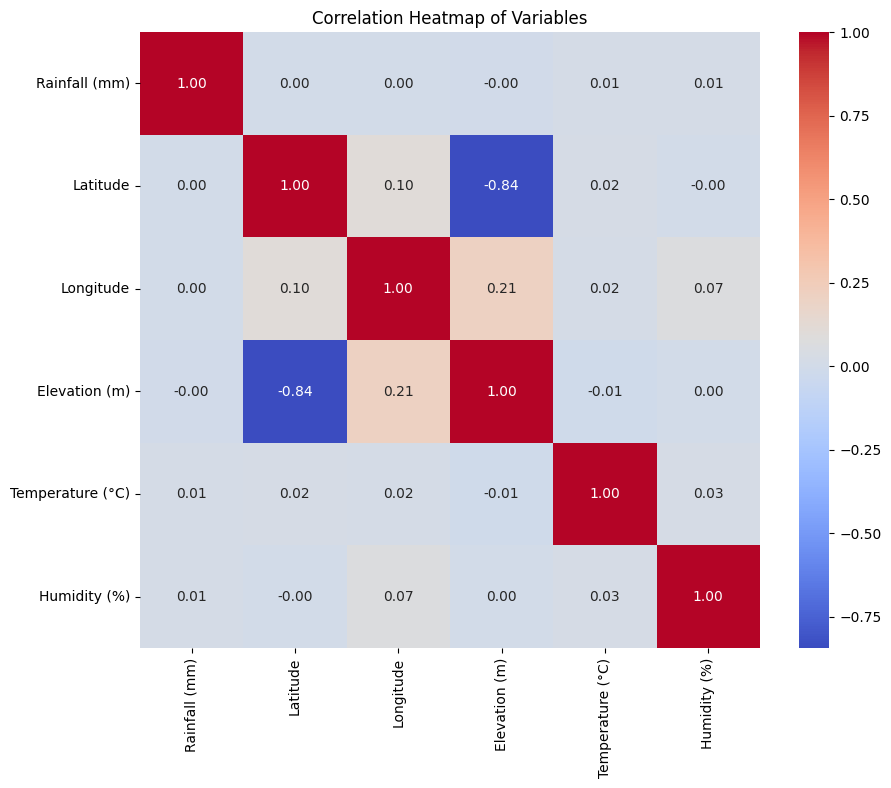

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[['Rainfall (mm)', 'Latitude', 'Longitude', 'Elevation (m)', 'Temperature (°C)', 'Humidity (%)']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Variables')
plt.show()
